In [1]:
import pandas as pd
import numpy as np
import timeit
import datetime as dt
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
#import plotly.graph_objs as go
%matplotlib inline

In [2]:
from pandas_datareader import data as pdr

/Users/reejungkim/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal


In [3]:
days_to_extract = 1000
days_to_forecast = 20

In [4]:
date_end = dt.date.today()
date_start = date_end - dt.timedelta(days_to_extract)

In [5]:
date_end, date_start

(datetime.date(2020, 7, 1), datetime.date(2017, 10, 5))

In [6]:
df = pdr.DataReader("VUSA.L", 'yahoo', date_start, date_end).reset_index()

df = df.loc[df['Date'].notnull()]

In [7]:
from fbprophet import Prophet

In [8]:
m = Prophet()

In [9]:
df.columns

Index(['Date', 'High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], dtype='object')

In [10]:
df.columns = ['ds', 'High', 'Low', 'Open', 'y', 'Volume', 'Adj Close']
df

,ds,High,Low,Open,y,Volume,Adj Close
0,2017-10-05,36.840000,36.279999,36.439999,36.840000,1543205.0,35.454132
1,2017-10-06,37.169998,37.009998,37.099998,37.070000,287495.0,35.675476
2,2017-10-09,36.970001,36.759998,36.950001,36.880001,223352.0,35.492622
3,2017-10-10,36.810001,36.630001,36.730000,36.619999,81585.0,35.242409
4,2017-10-11,36.790001,36.639999,36.720001,36.700001,132649.0,35.319401
...,...,...,...,...,...,...,...
678,2020-06-23,47.972500,47.459999,47.562500,47.652500,207895.0,47.652500
679,2020-06-24,47.537498,46.580002,47.457500,46.622501,764968.0,46.622501
680,2020-06-25,46.742500,46.042500,46.430000,46.445000,294754.0,46.445000
681,2020-06-26,47.230000,46.442501,47.000000,46.686199,365825.0,46.686199


In [11]:
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/Users/reejungkim/opt/anaconda3/envs/myenv/lib/python3.7/site-packages/pystan/misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [12]:
future = m.make_future_dataframe(periods=365)
future.tail()

,ds
1043,2021-06-27
1044,2021-06-28
1045,2021-06-29
1046,2021-06-30
1047,2021-07-01


In [13]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1043,2021-06-27,50.256796,41.164521,60.718165
1044,2021-06-28,49.920829,40.924746,60.548555
1045,2021-06-29,49.923174,40.959768,60.588487
1046,2021-06-30,49.906912,40.453091,60.413524
1047,2021-07-01,49.895249,40.193129,60.356768


In [14]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-10-05,36.087917,35.604617,38.375648,36.087917,36.087917,0.872871,0.872871,0.872871,-0.185765,-0.185765,-0.185765,1.058636,1.058636,1.058636,0.0,0.0,0.0,36.960787
1,2017-10-06,36.102291,35.639280,38.300765,36.102291,36.102291,0.793575,0.793575,0.793575,-0.181050,-0.181050,-0.181050,0.974625,0.974625,0.974625,0.0,0.0,0.0,36.895867
2,2017-10-09,36.145415,35.444460,38.201114,36.145415,36.145415,0.674317,0.674317,0.674317,-0.049255,-0.049255,-0.049255,0.723573,0.723573,0.723573,0.0,0.0,0.0,36.819732
3,2017-10-10,36.159790,35.362470,38.218392,36.159790,36.159790,0.565557,0.565557,0.565557,-0.078498,-0.078498,-0.078498,0.644055,0.644055,0.644055,0.0,0.0,0.0,36.725347
4,2017-10-11,36.174164,35.074215,37.987070,36.174164,36.174164,0.436778,0.436778,0.436778,-0.131710,-0.131710,-0.131710,0.568488,0.568488,0.568488,0.0,0.0,0.0,36.610942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,2021-06-27,50.141702,41.164521,60.718165,41.157692,60.342448,0.115094,0.115094,0.115094,0.313139,0.313139,0.313139,-0.198045,-0.198045,-0.198045,0.0,0.0,0.0,50.256796
1044,2021-06-28,50.150332,40.924746,60.548555,41.127295,60.395667,-0.229504,-0.229504,-0.229504,-0.049255,-0.049255,-0.049255,-0.180248,-0.180248,-0.180248,0.0,0.0,0.0,49.920829
1045,2021-06-29,50.158963,40.959768,60.588487,41.096898,60.448886,-0.235789,-0.235789,-0.235789,-0.078498,-0.078498,-0.078498,-0.157291,-0.157291,-0.157291,0.0,0.0,0.0,49.923174
1046,2021-06-30,50.167593,40.453091,60.413524,41.066501,60.524667,-0.260681,-0.260681,-0.260681,-0.131710,-0.131710,-0.131710,-0.128971,-0.128971,-0.128971,0.0,0.0,0.0,49.906912


In [15]:
df

,ds,High,Low,Open,y,Volume,Adj Close
0,2017-10-05,36.840000,36.279999,36.439999,36.840000,1543205.0,35.454132
1,2017-10-06,37.169998,37.009998,37.099998,37.070000,287495.0,35.675476
2,2017-10-09,36.970001,36.759998,36.950001,36.880001,223352.0,35.492622
3,2017-10-10,36.810001,36.630001,36.730000,36.619999,81585.0,35.242409
4,2017-10-11,36.790001,36.639999,36.720001,36.700001,132649.0,35.319401
...,...,...,...,...,...,...,...
678,2020-06-23,47.972500,47.459999,47.562500,47.652500,207895.0,47.652500
679,2020-06-24,47.537498,46.580002,47.457500,46.622501,764968.0,46.622501
680,2020-06-25,46.742500,46.042500,46.430000,46.445000,294754.0,46.445000
681,2020-06-26,47.230000,46.442501,47.000000,46.686199,365825.0,46.686199


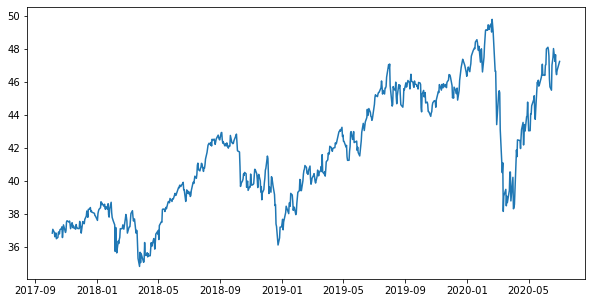

In [16]:
plt.figure(figsize=(10,5))
plt.plot(df.set_index('ds').y)
plt.show()

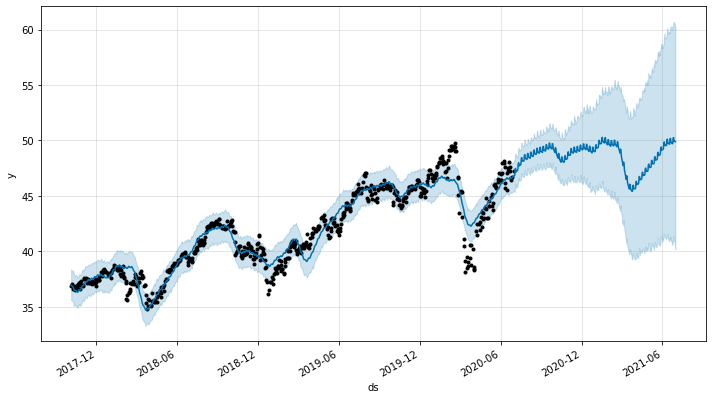

In [17]:
m.plot(forecast).autofmt_xdate()

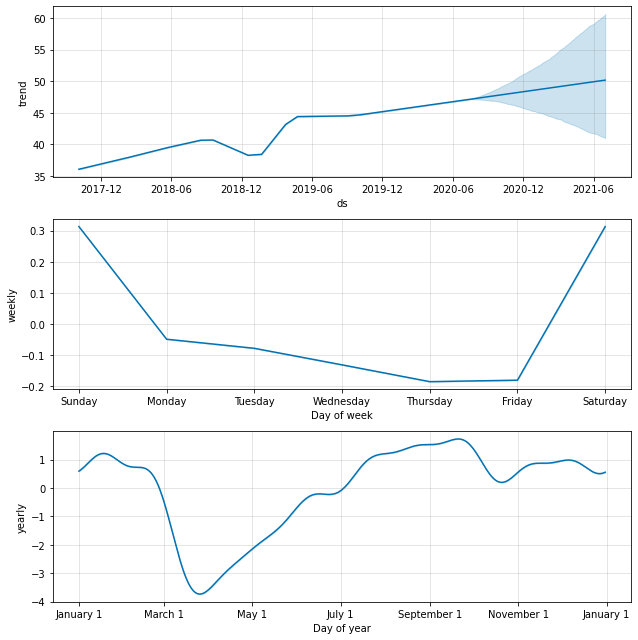

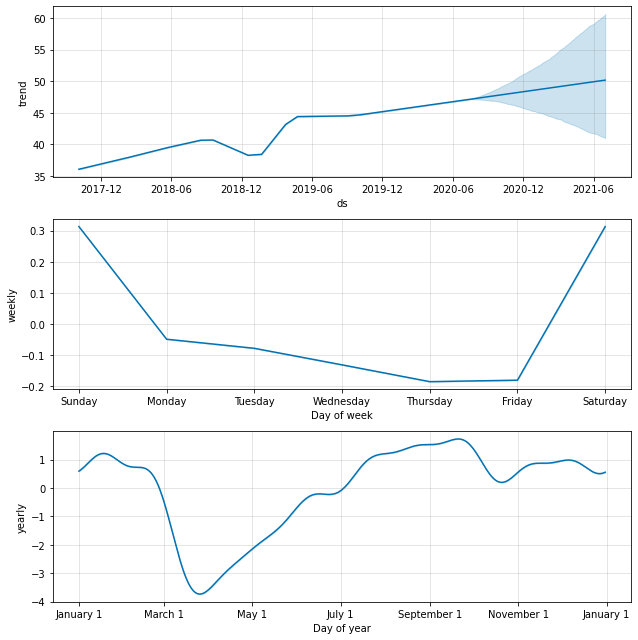

In [18]:
m.plot_components(forecast)

In [19]:
df.y = np.log(df.y)

In [20]:
df['cap' ]= 8.5

In [21]:
df

,ds,High,Low,Open,y,Volume,Adj Close,cap
0,2017-10-05,36.840000,36.279999,36.439999,3.606584,1543205.0,35.454132,8.5
1,2017-10-06,37.169998,37.009998,37.099998,3.612808,287495.0,35.675476,8.5
2,2017-10-09,36.970001,36.759998,36.950001,3.607669,223352.0,35.492622,8.5
3,2017-10-10,36.810001,36.630001,36.730000,3.600595,81585.0,35.242409,8.5
4,2017-10-11,36.790001,36.639999,36.720001,3.602777,132649.0,35.319401,8.5
...,...,...,...,...,...,...,...,...
678,2020-06-23,47.972500,47.459999,47.562500,3.863935,207895.0,47.652500,8.5
679,2020-06-24,47.537498,46.580002,47.457500,3.842083,764968.0,46.622501,8.5
680,2020-06-25,46.742500,46.042500,46.430000,3.838269,294754.0,46.445000,8.5
681,2020-06-26,47.230000,46.442501,47.000000,3.843449,365825.0,46.686199,8.5


In [23]:
m = Prophet(growth = 'logistic')
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


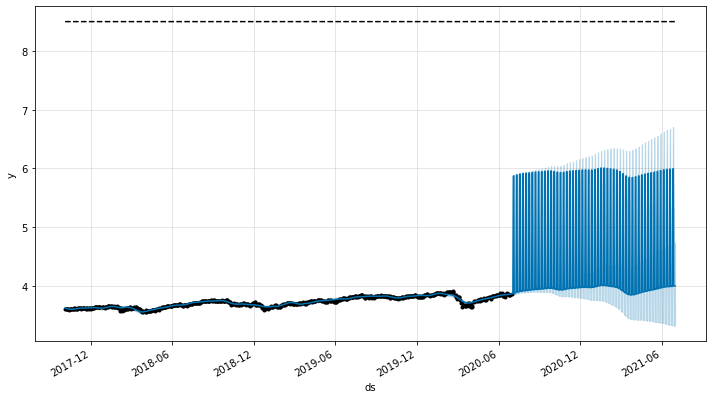

In [24]:
future = m.make_future_dataframe(periods=365)
future['cap'] = 8.5
fcst = m.predict(future)
m.plot(fcst).autofmt_xdate()

In [ ]:
df.dtypes

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.relplot(x='Date', y='Close', kind='line', data=df).fig.autofmt_xdate()